In [3]:
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
from keras.layers import Convolution2D

# Place the image paths into a list and read them using cv2. Then resize them and turn into grayscale before adding into the image list.

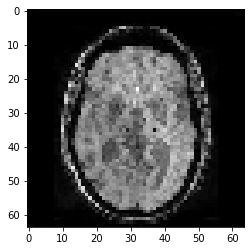

In [4]:
img_size = 64    

df = pd.read_csv("./Desktop/AMLS/label.csv")
lbl = pd.get_dummies(df['label'])
lbl =np.array(lbl)
path = "./Desktop/AMLS/image"
image_paths = list(paths.list_images(path))
 
images = []
    
for image_path in image_paths:
    image = cv2.imread(image_path,0)
    image = cv2.resize(image, (img_size, img_size))
    images.append(image)
plt.imshow(images[1],cmap = plt.cm.gray)

# Create two empty lists, and for all 3000 data, send the label into one and the image into the other. This can work without the if statements, but this was the first so it was kept in the code since it is working. Then join them together.

In [21]:
Y = []
X = []
training_data = []
for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "meningioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
    elif "pituitary_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "glioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
for i in range(0,3000):
    training_data.append([X[i],Y[i]])


# After joining the datasets, the list is shuffled since there were same label data point coming after each other.

In [22]:
import random

random.shuffle(training_data)

# The lists are seperated once again and turned into numpy arrays. The image is reshaped again and it is normalized before put into model.

In [23]:
Y = []
X = []
for x, y in training_data:
    X.append(x)
    Y.append(y)
    
X = np.array(X).reshape(-1,img_size,img_size,1)    

In [24]:
X = X/255.0
Y =np.array(Y)
X.shape[1:]

(64, 64, 1)

# CNN is modelled with two 2D convolution layers and two seperate dropouts to decrease overfitting.

In [25]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(.2))   

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))     
model.add(Dropout(.2)) 

model.add(Dense(4))
model.add(Activation('softmax'))
          
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                        

# Model is trained with the set values.

In [26]:
history = model.fit(X,Y, batch_size=12,epochs=11,validation_split=0.2)

Epoch 1/11
200/200 [==============================] - 11s 51ms/step - loss: 1.0849 - accuracy: 0.5446 - val_loss: 0.9141 - val_accuracy: 0.6400
Epoch 2/11
200/200 [==============================] - 10s 52ms/step - loss: 0.7502 - accuracy: 0.6933 - val_loss: 0.6961 - val_accuracy: 0.7433
Epoch 3/11
200/200 [==============================] - 10s 51ms/step - loss: 0.5881 - accuracy: 0.7658 - val_loss: 0.5654 - val_accuracy: 0.7783
Epoch 4/11
200/200 [==============================] - 11s 55ms/step - loss: 0.4641 - accuracy: 0.8196 - val_loss: 0.4580 - val_accuracy: 0.8417
Epoch 5/11
200/200 [==============================] - 12s 60ms/step - loss: 0.3529 - accuracy: 0.8679 - val_loss: 0.4021 - val_accuracy: 0.8633
Epoch 6/11
200/200 [==============================] - 11s 57ms/step - loss: 0.2794 - accuracy: 0.8917 - val_loss: 0.3595 - val_accuracy: 0.8850
Epoch 7/11
200/200 [==============================] - 12s 58ms/step - loss: 0.2184 - accuracy: 0.9250 - val_loss: 0.3495 - val_accuracy:

# Validation loss and accuracy values are plotted against the epoch number.

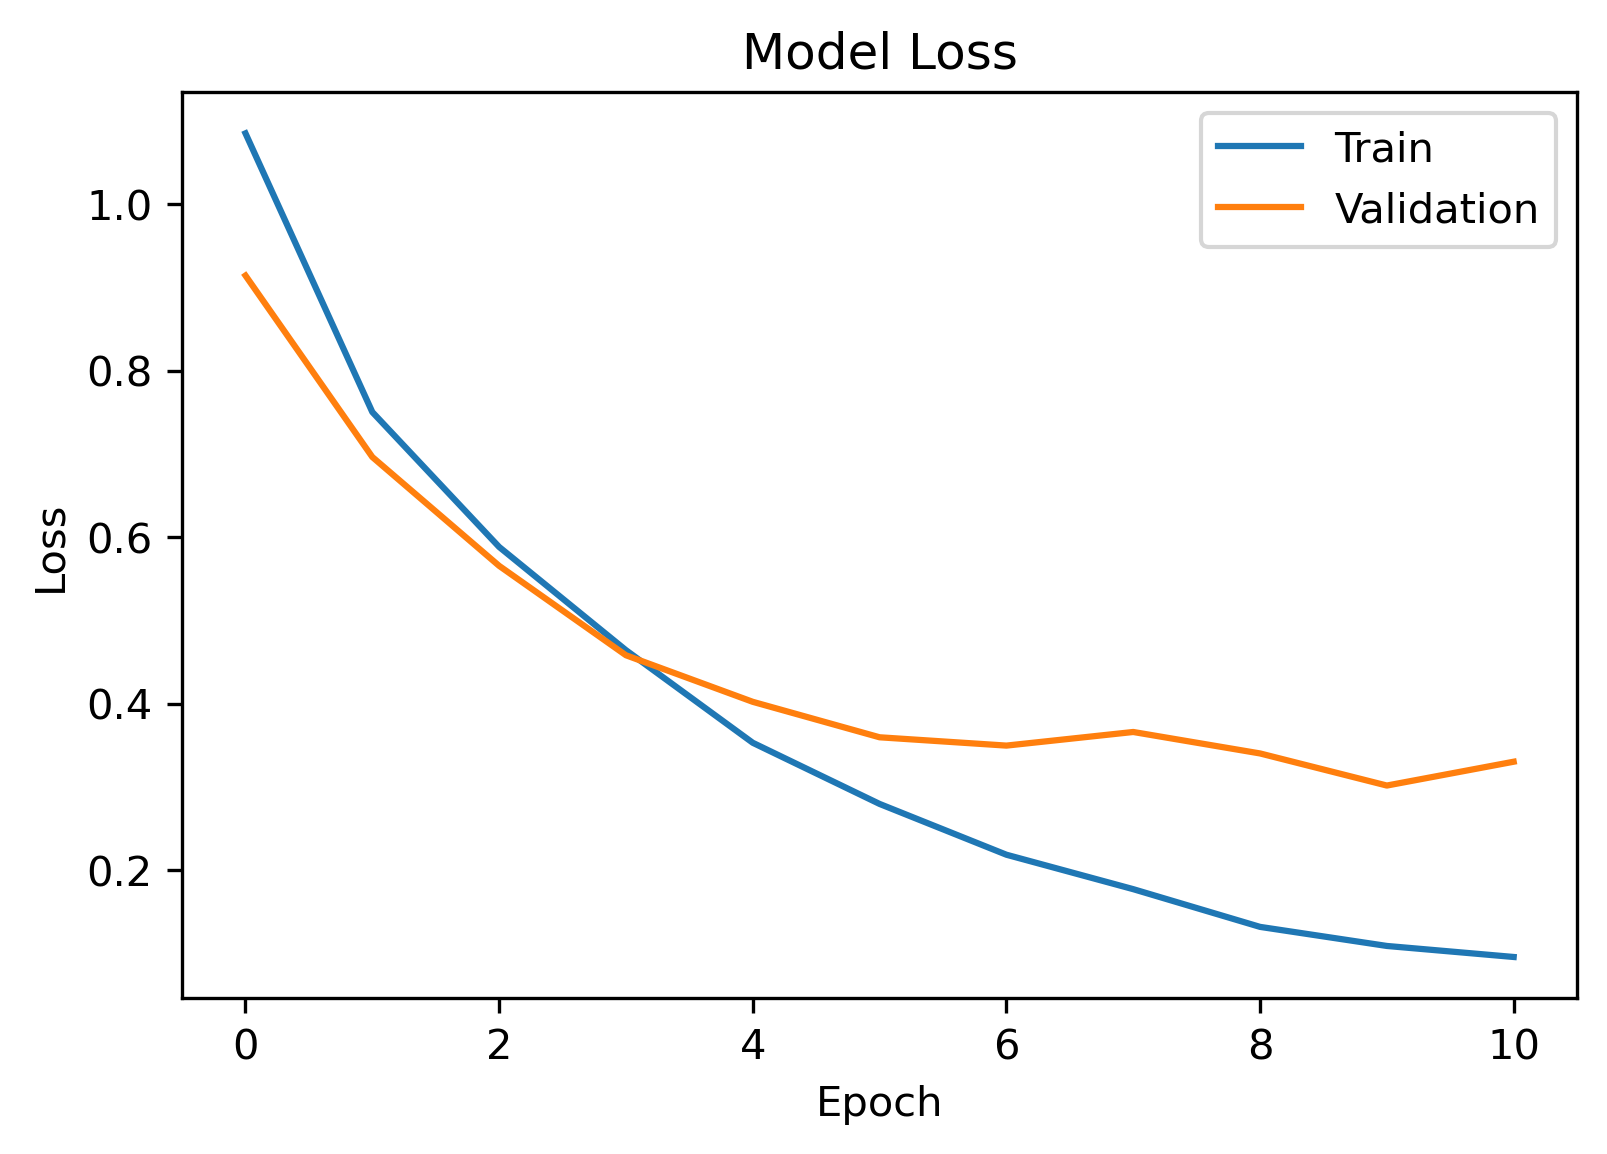

In [36]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

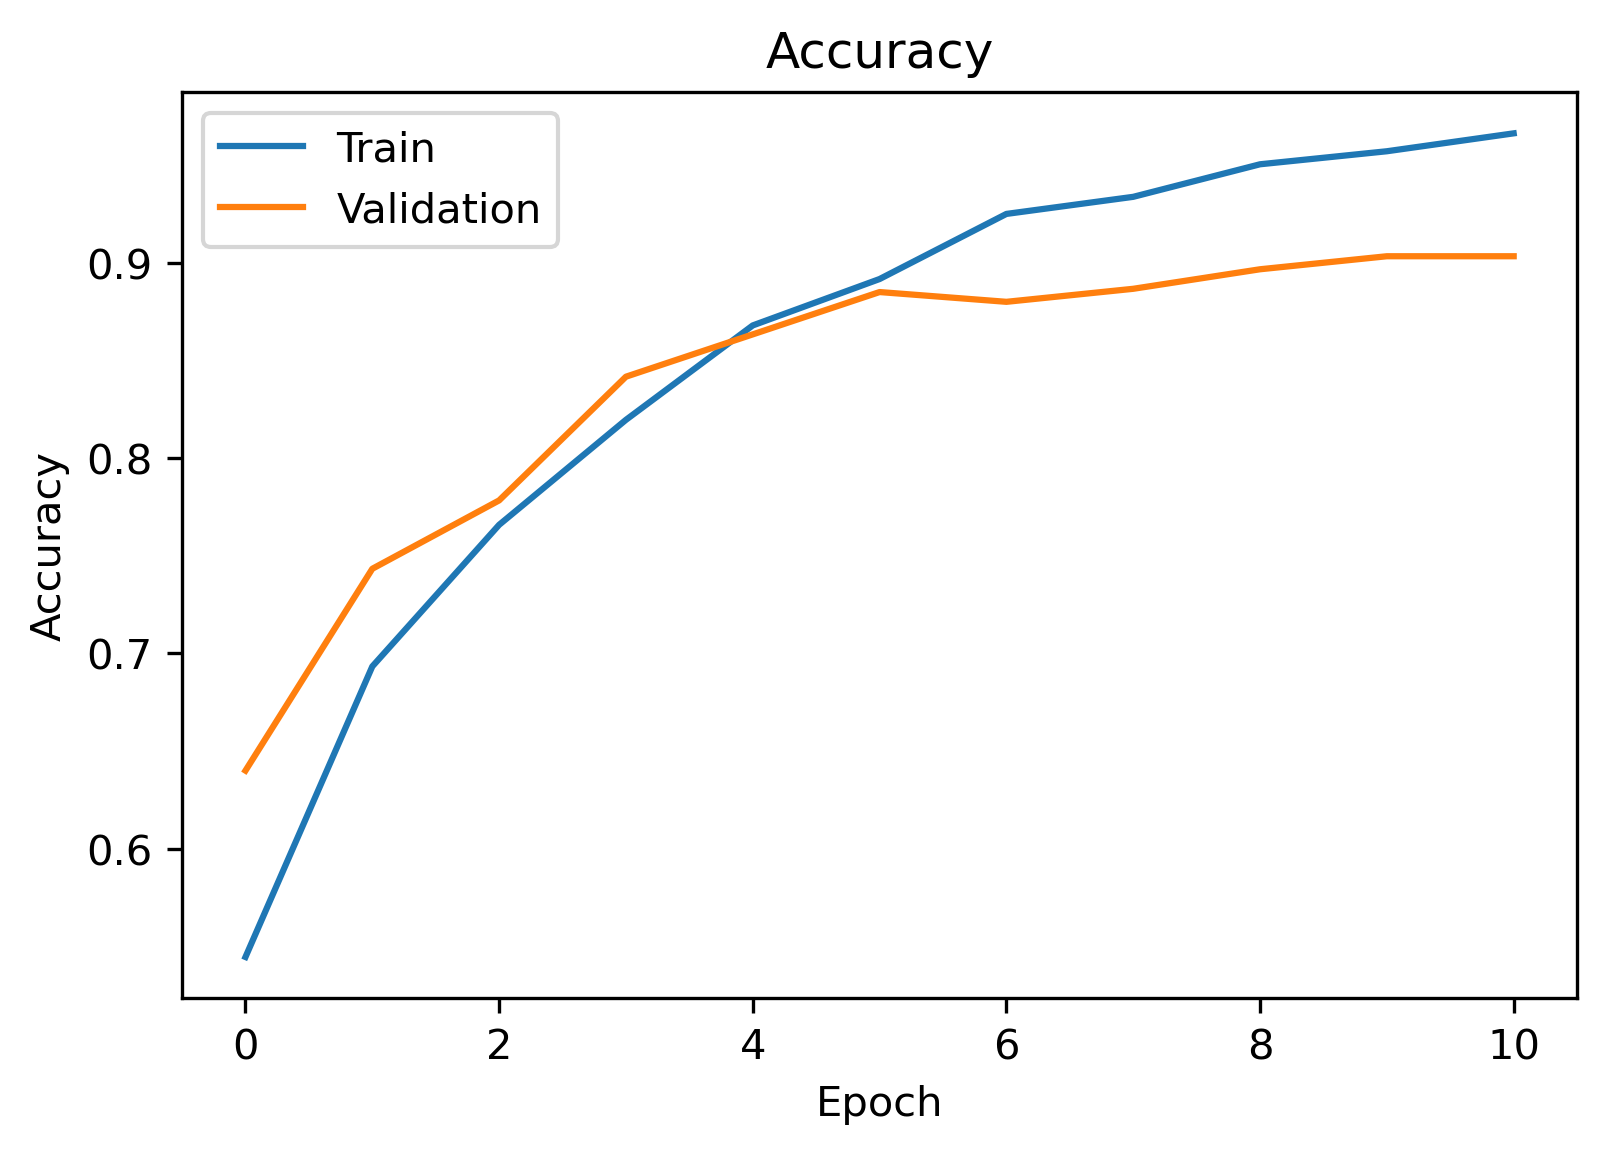

In [33]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Additional testing data is loaded and goes through the same reading and processing steps. It then gets inputted to model.evaluate and the output is the accuracy and model loss.

In [42]:
dft = pd.read_csv("./Desktop/AMLS/test/label.csv")
lblt = pd.get_dummies(dft['label'])
lblt =np.array(lblt)
patht = "./Desktop/AMLS/test/image"
image_pathst = list(paths.list_images(patht))
 
imagest = []
    
for image_path in image_pathst:
    image = cv2.imread(image_path,0)
    image = cv2.resize(image, (img_size, img_size))
    imagest.append(image)

Yt = []
Xt = []
training_data = []
for i in range(0, 200):
    
    if "no_tumor" in (dft.iat[i,1]): 
        Yt.append(lblt[i])
        Xt.append(imagest[i])
    elif "meningioma_tumor" in (dft.iat[i,1]):
        Yt.append(lblt[i])
        Xt.append(imagest[i])
    elif "pituitary_tumor" in (dft.iat[i,1]): 
        Yt.append(lblt[i])
        Xt.append(imagest[i])
    elif "glioma_tumor" in (dft.iat[i,1]):
        Yt.append(lblt[i])
        Xt.append(imagest[i])
for i in range(0,200):
    training_data.append([Xt[i],Yt[i]])
Yt = []
Xt = []
for features, label in training_data:
    Xt.append(features)
    Yt.append(label)
    
Xt = np.array(Xt).reshape(-1,img_size,img_size,1)  
Xt = Xt/255.0
Yt =np.array(Yt)
additional_test = model.evaluate(Xt,Yt,batch_size=16)
print("model loss, accuracy:",additional_test)

13/13 [==============================] - 0s 14ms/step - loss: 0.3610 - accuracy: 0.8950
model loss, accuracy: [0.3610410988330841, 0.8949999809265137]
